<a href="https://colab.research.google.com/github/vvrgit/ML-Optimization/blob/main/BGD_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Batch Gradient Descent Optimization for Machine Learning***

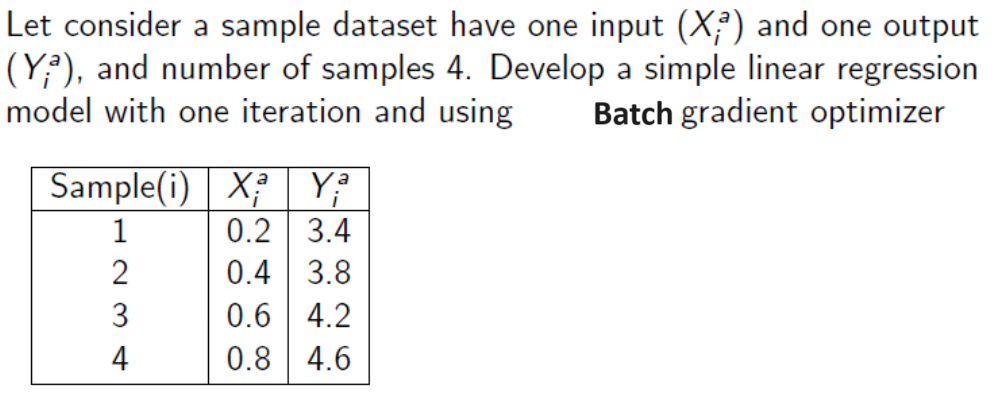

# **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [2]:
import numpy as np
import math as mt
import random
import pandas as pd

**Load Data**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/sampledata.csv')
data.head()

,X,Y
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


**Split Data**

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.01, random_state = 10)

# **Initialization**

In [5]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.9
max_iter=10000

***Gradient Computation***

In [6]:
def gradient(m,c,datax,datay):
  m_deriv=0
  c_deriv=0
  for i in range(len(datax)):
    m_deriv=m_deriv-(y_train.iloc[i]-m*x_train.iloc[i]-c)*x_train.iloc[i]
    c_deriv=c_deriv-(y_train.iloc[i]-m*x_train.iloc[i]-c)
  m_deriv=m_deriv/len(datax)
  c_deriv=c_deriv/len(datax)
  return m_deriv,c_deriv

**Model Training**

In [7]:
for iter in range(max_iter):
  gm,gc=gradient(m,c,x_train,y_train)
  delm=-eta*gm
  delc=-eta*gc
  m=m+delm
  c=c+delc

print('model parameter m and c',m,c)

model parameter m and c 2.000000000000004 2.999999999999998


**Training MSE**

In [8]:
q2=len(x_train)
error=0;
for j in range(q2):
    n2=m*x_train.iloc[j]+c
    error=error+(y_train.iloc[j]-n2)**2
error=error/q2
error

1.7091986279788588e-30

**Testing MSE**

In [11]:
q1=len(x_test)
error=0;
for j in range(q1):
    n2=m*x_test.iloc[j]+c
    error=error+(y_test.iloc[j]-n2)**2
error=error/q1
error

0.0

**Model Deployment**

In [16]:
m=2
c=3
X=input('enter X value')
Y=m*float(X)+c
print('Y=',Y)

enter X value5
Y= 13.0


# ***Thank You***

Import Libraries

In [21]:
import numpy as np
import random
import math as mt
import pandas as pd

Load data

In [22]:
data=pd.read_csv('/content/Dataset-NAG-Assignment.csv')
data.head()

,L(T-1),L(T)
0,5551.82208,4983.17184
1,4983.17184,4888.39680
2,4888.39680,5072.95872
3,5072.95872,5196.25980
4,5196.25980,5641.29720


In [24]:
IP_min=data['L(T-1)'].min()
IP_max=data['L(T-1)'].max()
OP_min=data['L(T)'].min()
OP_max=data['L(T)'].max()

Data Normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data_norm=scaler.transform(data)
data_norm

array([[0.39787738, 0.29380046],
       [0.29380046, 0.27645431],
       [0.27645431, 0.31023366],
       ...,
       [0.21779692, 0.24629825],
       [0.24629825, 0.32438447],
       [0.32438447, 0.65165045]])

2D to Data Frame

In [25]:
data_norm=pd.DataFrame(data_norm,columns=['IP','OP'])
data_norm.head()

,IP,OP
0,0.397877,0.293800
1,0.293800,0.276454
2,0.276454,0.310234
3,0.310234,0.332801
4,0.332801,0.414254


Initialize

In [32]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.9
max_iter=10

Data Split

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_norm.IP, data_norm.OP, test_size = 0.10, random_state = 10)

Gradient Computtaion

In [29]:
def gradient(m,c,x_train,y_train):
  m_deriv=0
  c_deriv=0
  for i in range(len(x_train)):
    m_deriv=m_deriv-(y_train.iloc[i]-m*x_train.iloc[i]-c)*x_train.iloc[i]
    c_deriv=c_deriv-(y_train.iloc[i]-m*x_train.iloc[i]-c)
  m_deriv=m_deriv/len(x_train)
  c_deriv=c_deriv/len(x_train)
  return m_deriv,c_deriv

Training Model

In [33]:
for iter in range(max_iter):
  gm,gc=gradient(m,c,x_train,y_train)
  delm=-eta*gm
  delc=-eta*gc
  m=m+delm
  c=c+delc

print('model parameter m and c',m,c)


model parameter m and c 6.867969500287733 -2.945829793644134


Train MSE

In [34]:
q2=len(x_train)
error=0;
for j in range(q2):
    n2=m*x_train.iloc[j]+c
    error=error+(y_train.iloc[j]-n2)**2
error=error/q2
error

1.4348620568917496

Testing MSE

In [35]:
q1=len(x_test)
error=0;
for j in range(q1):
    n2=m*x_test.iloc[j]+c
    error=error+(y_test.iloc[j]-n2)**2
error=error/q1
error

1.4375474845435934

Model Deployment and Application Development

In [41]:
m=6.9
c=-3
x=input('enter the value of previous hour load')
x_norm=(float(x)-IP_min)/(IP_max-IP_min)
Y_norm=m*float(x_norm)+c
Y=Y_norm*(OP_max-OP_min)+OP_min
print('Predicted Load=',Y)

enter the value of previous hour load5000
Predicted Load= -1820.9752800000006


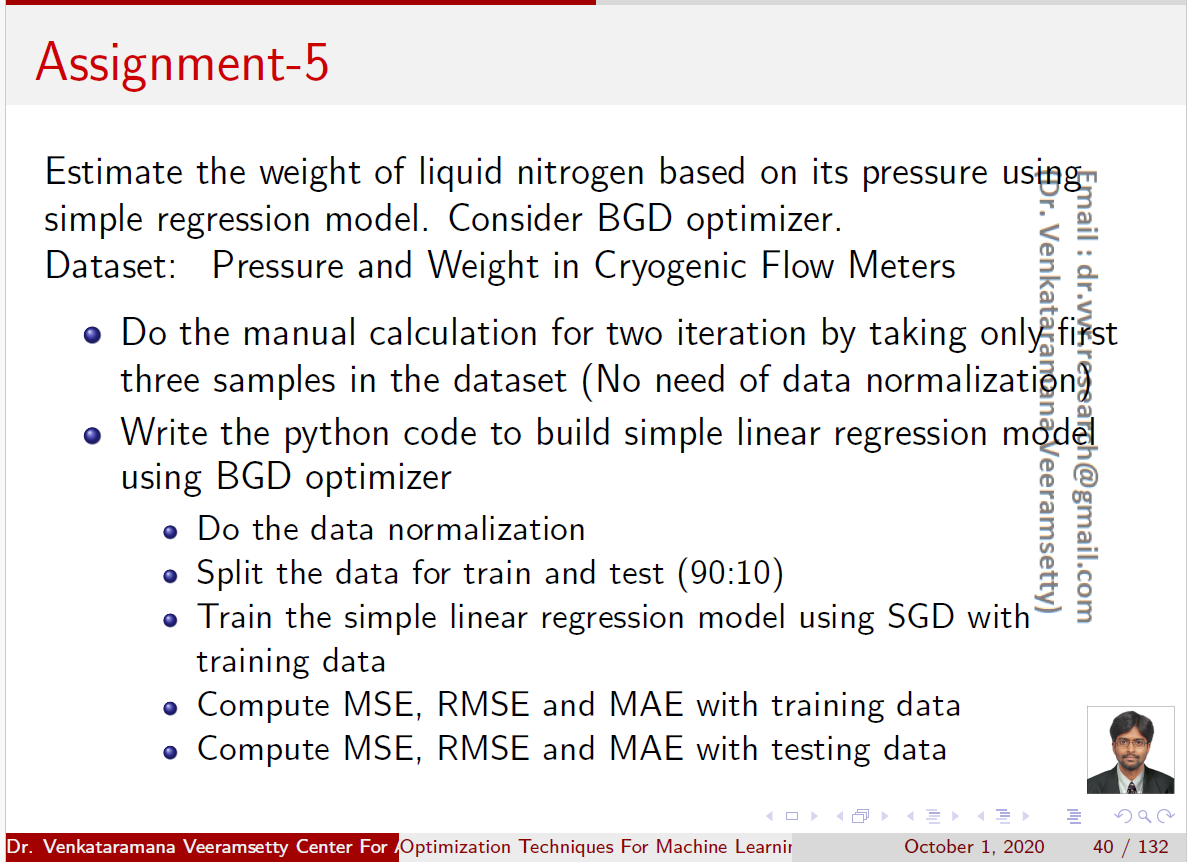